# Analiza filmov

Za to projektno nalogo sem pridobila podatke iz spletne strani <a href="https://www.imdb.com/chart/top/" style="color: olive;">IMDb</a>.


Dodatne informacije o projektu in navodila najdete v <a href="https://github.com/zalap7/projektna_naloga/blob/main/README.md" style="color: olive;">README.md</a>.


In [3]:
# Uvoz osnovnih knjižnic 
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time

## 1. Pridobivanje podatkov iz IMDb

Za avtomatsko pridobivanje podatkov o najboljših filmih na IMDb sem uporabila knjižnico Selenium.    

Pridobljeni podatki so:
- naslov filma,
- ocena filma,
- število glasov,
- leto izdaje,
- žanr.

In [5]:
# Pridobivanje podatkov iz IMDb
from pridobi_podatke import getIMDBdata

naslovi, ocene, stevilo_glasov, leto_izdaje, zanr = getIMDBdata()

## 2. Shranjevanje podatkov v CSV

Pridobljene podatke sem shranila v '.csv' datoteko za boljši pregled. Hkrati lahko tako podatke kasneje enostavno obdelujemo brez ponovnega spletnega pridobivanja.


In [2]:
import pandas as pd

df = pd.read_csv("imdb_movies.csv")
df.index = df.index + 1

# Ločitev žanrov z vejico
df['Žanr'] = df['Žanr'].apply(lambda x: ', '.join(x.split()))

# Urejanje tabele
styled_df = df.style.set_properties(**{'text-align': 'left'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'left')]},
        {'selector': '', 'props': [('width', '100%'), ('table-layout', 'fixed')]}
    ]) \
    .format({'Ocene': '{:.1f}'}) 

styled_df


,Naslovi,Ocene,Število glasov,Leto izdaje,Žanr
1,Kaznilnica odrešitve,9.3,3.1M,1994,Drama
2,Boter,9.2,2.2M,1972,"Crime, Drama"
3,Vitez teme,9.1,3.1M,2008,"Action, Crime, Drama"
4,"Boter, II. del",9.0,1.4M,1974,"Crime, Drama"
5,12 jeznih mož,9.0,944K,1957,"Crime, Drama"
6,Gospodar prstanov: Kraljeva vrnitev,9.0,2.1M,2003,"Adventure, Drama, Fantasy"
7,Schindlerjev seznam,9.0,1.5M,1993,"Biography, Drama, History"
8,Šund,8.8,2.4M,1994,"Crime, Drama"
9,Gospodar prstanov: Bratovscina prstana,8.9,2.1M,2001,"Adventure, Drama, Fantasy"
10,"Dober, grd, hudoben",8.8,865K,1966,"Adventure, Drama, Western"


## 3. Filmi z več kot dvema milijonoma glasov

Iz osnovne zbirke top 250 filmov sem nato v tabeli zbrala le tiste, ki imajo več kot 2 milijona oddanih glasov. S tem sem poiskala filme, ki so bili ocenjeni s strani zelo velikega števila gledalcev in so zato verjetno bolj splošno prepoznavni ter priljubljeni. Poleg tega so ocene teh filmov zaradi velikega števila glasov verjetno bolj realne. 

Zanimivo je, da prva tri mesta zasedajo enaki filmi kot v osnovni zbirki, kar dodatno potrjuje njihovo priljubljenost.



In [3]:
import pandas as pd

df = pd.read_csv('imdb_movies_2Mplus.csv')

df.index = df.index + 1

# Ločitev žanrov z vejico
df['Žanr'] = df['Žanr'].str.replace(',', '')  
df['Žanr'] = df['Žanr'].str.split().apply(lambda x: ', '.join(x)) 

# Urejanje tabele
styled_df = df.style.set_properties(**{
    'text-align': 'left'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'left')]}
])

styled_df



,Naslovi,Ocene,Število glasov,Leto izdaje,Žanr
1,Kaznilnica odrešitve,9.300000,3100000,1994,Drama
2,Boter,9.200000,2200000,1972,"Crime, Drama"
3,Vitez teme,9.100000,3100000,2008,"Action, Crime, Drama"
4,Gospodar prstanov: Kraljeva vrnitev,9.000000,2100000,2003,"Adventure, Drama, Fantasy"
5,Šund,8.800000,2400000,1994,"Crime, Drama"
6,Gospodar prstanov: Bratovscina prstana,8.900000,2100000,2001,"Adventure, Drama, Fantasy"
7,Forrest Gump,8.800000,2400000,1994,"Drama, Romance"
8,Klub golih pesti,8.800000,2500000,1999,"Crime, Drama, Thriller"
9,Izvor,8.800000,2700000,2010,"Action, Adventure, Sci-Fi"
10,Matrica,8.700000,2200000,1999,"Action, Sci-Fi"


## 4. Analiza ocen po desetletjih

Zanimalo me je, iz katerega desetletja prihajajo tisti filmi, ki so gledalcem najbolj pri srcu.
Zato sem filme razdelila glede na leto izzida in jih združila po desetletjih. Za vsako desetletje sem nato izračunala povprečno oceno in rezultate prikazala v obliki stolpčnega diagrama.

Ugotovila sem, da imajo najvišjo povprečno oceno filmi iz devetdesetih let. Prav tako so zelo dobro ocenjeni filmi iz šestdesetih in sedemdesetih let. Dobro ocenjeno je tudi trenutno desetletje, medtem ko je najslabše ocenjeno obdobje dvajsetih let prejšnjega stoletja.


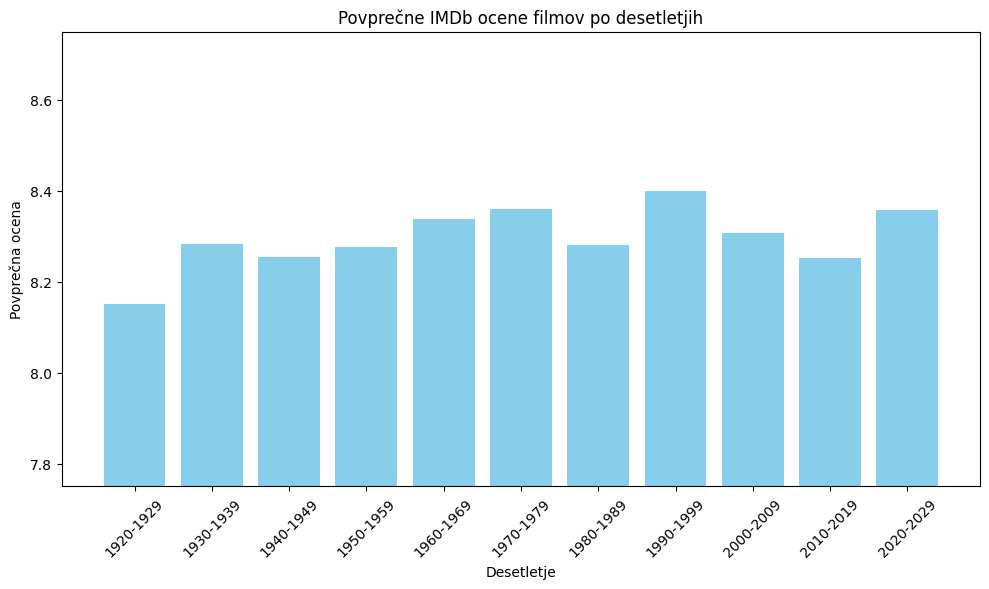

In [11]:
from ocene_po_letih import zdruzi_ocene_po_letih

zdruzi_ocene_po_letih(naslovi,ocene,leto_izdaje)

## 5. Top film desetletja

Zadala sem si nalogo, da pogledam najbolje ocenjen film iz vsakega desetletja, zato sem s pomočjo funkcije poiskala naslove in ocene teh filmov. Rezultate sem prikazala na časovnici.


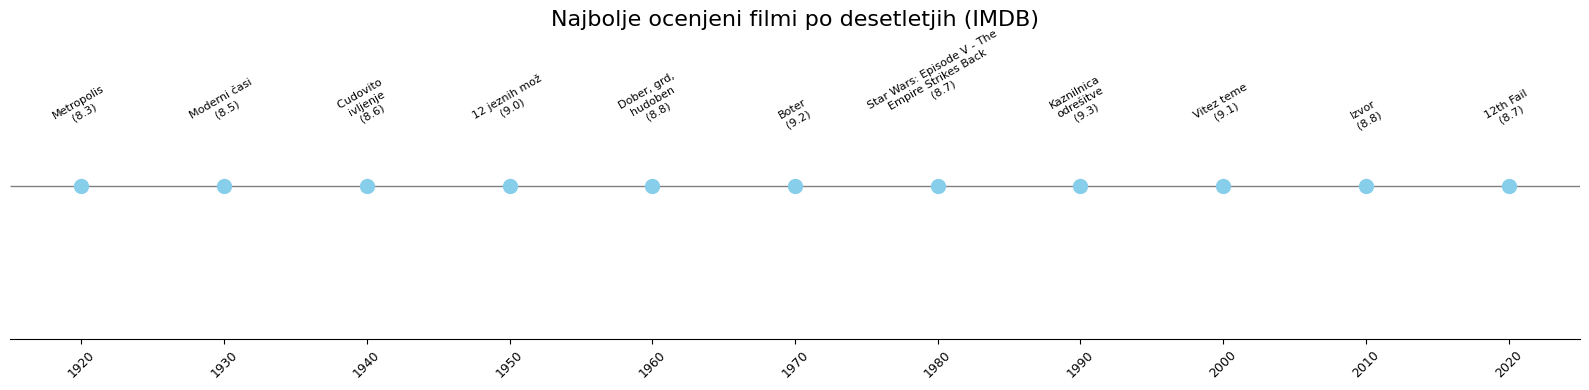

In [12]:
from top_filmi_desetletja import najbolje_ocenjeni

najbolje_ocenjeni(naslovi,ocene,leto_izdaje)

## 6. Analiza ocen po žanrih

Filme sem primerjala tudi po žanrih, ker me je zanimalo, ali so moji najljubši žanri tudi najbolje ocenjeni. Rezultate sem ponovno prikazala s stolpčnim diagramom.

Najbolj priljubljeni so fantazijski, vesterni filmi in muzikali, najmanj priljubljeni pa so očitno športni filmi. Najbolj me je presenetila nizka povprečna ocena komedij.


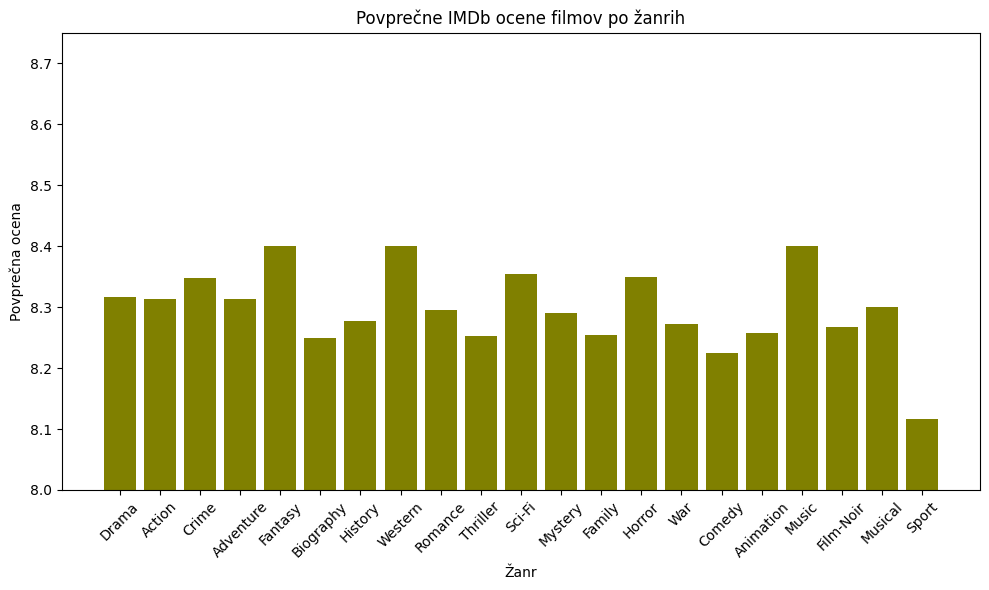

In [14]:
from ocene_po_zanrih import zdruzi_ocene_po_zanrih

zdruzi_ocene_po_zanrih(ocene,zanr)

## 7. Zaključek

Rezultati analize filmov glede na desetletje nastanka me niso presenetili, saj tudi sama uživam v filmih devetdesetih let. Presenetili pa so me rezultati analize filmov glede na žanr, ker moji najljubši žanri očitno niso priljubljeni. Zdaj pa se bom lotila zadane naloge iz točke 5 in si ogledala Metropolis. 